In [98]:
# IMPORTS
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statistics as stat
import time
import os
import glob
from collections import deque
import scipy

In [61]:
# READ-IN CLEAN ARC DATAFRAME
filename = 'data/tidy/all_arc_count_data'
arc_counts_df = pd.read_csv(filename, parse_dates=['Time']).fillna(0) # 
print(f"{filename} : file read into a pandas dataframe.")
#arc_count_df["Time"] = arc_count_df["Time"].astype(str)
arc_counts_df

data/tidy/all_arc_count_data : file read into a pandas dataframe.


,Time,B2 Beam Blanker,B2 Bias,B2 Extractor,B2 Filament,B2 Gun Lens,B2 Main Lens,B2 Suppressor,B3 Beam Blanker,B3 Bias,...,D3 Gun Lens,D3 Main Lens,D3 Suppressor,D4 Beam Blanker,D4 Bias,D4 Extractor,D4 Filament,D4 Gun Lens,D4 Main Lens,D4 Suppressor
0,2024-06-14 01:55:12,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1,2024-06-14 01:55:13,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
2,2024-06-14 01:55:14,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
3,2024-06-14 01:55:15,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
4,2024-06-14 01:55:16,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060403,2024-06-27 23:59:54,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1060404,2024-06-27 23:59:55,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1060405,2024-06-27 23:59:56,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1060406,2024-06-27 23:59:57,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00


In [62]:
# CONVERT ARC DATA FROM PANDAS DATAFRAME TO NUMPY ARRAY (NP RUNS INTERNALLY ON C CODE, THUS FASTER TO WORK WITH ON LARGE DATASETS)
arc_counts_arr = arc_counts_df.to_numpy()
arc_counts_arr

array([[Timestamp('2024-06-14 01:55:12'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:13'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:14'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [Timestamp('2024-06-27 23:59:56'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:57'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:58'), 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [63]:
# READ IN PRESSURE DATA AS PANDAS DATAFRAME
filename = 'data/tidy/pressure_data'
pressure_df = pd.read_csv(filename, parse_dates=['Time']).fillna(0)    
print(f"{filename} : file read into a pandas dataframe.")
#pressure_df["Time"] = pressure_df["Time"].astype(str)
pressure_df["Chamber Pressure"] = pressure_df["Chamber Pressure"].astype(np.float64)
pressure_df["Column Pressure"] = pressure_df["Column Pressure"].astype(np.float64)
pressure_df

data/tidy/pressure_data : file read into a pandas dataframe.


,Time,Chamber Pressure,Column Pressure
0,2024-06-14 01:55:29,1.85e-07,5.55e-10
1,2024-06-14 01:55:30,1.84e-07,5.67e-10
2,2024-06-14 01:55:31,1.83e-07,5.54e-10
3,2024-06-14 01:55:32,1.80e-07,5.61e-10
4,2024-06-14 01:55:33,1.81e-07,5.49e-10
...,...,...,...
1059524,2024-06-27 23:59:54,1.65e-07,3.38e-10
1059525,2024-06-27 23:59:55,1.63e-07,3.37e-10
1059526,2024-06-27 23:59:56,1.64e-07,3.41e-10
1059527,2024-06-27 23:59:57,1.65e-07,3.38e-10


In [64]:
# CONVERT PRESSURE DATA TO NUMPY ARRAY
pressure_arr = pressure_df.to_numpy()
pressure_arr

array([[Timestamp('2024-06-14 01:55:29'), 1.85e-07, 5.55e-10],
       [Timestamp('2024-06-14 01:55:30'), 1.84e-07, 5.67e-10],
       [Timestamp('2024-06-14 01:55:31'), 1.83e-07, 5.54e-10],
       ...,
       [Timestamp('2024-06-27 23:59:56'), 1.64e-07, 3.41e-10],
       [Timestamp('2024-06-27 23:59:57'), 1.65e-07, 3.38e-10],
       [Timestamp('2024-06-27 23:59:58'), 1.64e-07, 3.4e-10]],
      dtype=object)

In [65]:
# GRAB TIMES OF ALL ARC COUNTS (FOR EACH COMPONENT)
def get_arc_times(col_hvps):
    '''Given a column HVSP, find Time values of all arc events
        Argument
        col_idx:   type=int            index of the column HVSP of measure within arc_counts
        Return
        arc_times_df: type=np.array    numpy array arc_counts filtered to keep just arc events of column HVSP of measure
    '''
    arc_times = arc_counts_df[arc_counts_df[col_hvps] > 0]["Time"]
    if len(arc_times) > 0: 
        arc_idx = np.where(pressure_df["Time"].isin(arc_times))[0]
    else: arc_idx = []
    return arc_times, arc_idx

In [66]:
def pressure_at_arc_plot(col_hvps, arc, pressure, cham_max, cham_max_idx, cham_max_time, cham_local_mean, cham_delta, col_max, col_max_idx, col_max_time, col_local_mean, col_delta, local_mean_range):
    # INITIALIZE
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax1.axvline(x=arc, color='black', linewidth=0.75)
    # PLOT VARIABLES 
    time = pressure[:,0]
    cham_pres = pressure[:, 1]
    col_pres = pressure[:, 2]
    # CHAMBER PRESSURE
    sns.lineplot(x=time, y=cham_pres, ax=ax1, label='Chamber Pressure', color='b')
    ax1.set_ylabel('Chamber Pressure')
    ax1.set_xlabel('Time')
    ax1.hlines(xmin=pressure[cham_max_idx-local_mean_range-1, 0], xmax=cham_max_time, y=cham_local_mean, color='b', linestyle='--', linewidth=0.8, label=f'Mean Before Spike ({cham_local_mean:.2e})')
    ax1.vlines(x=cham_max_time, ymin=cham_local_mean, ymax=cham_max, color='b', linestyle='--', linewidth=0.8, label=f'Delta ({cham_delta:.2e})')
    ax1.scatter(x=cham_max_time, y=cham_max, color='b', s=100, label=f'Spike Value ({cham_max:.2e})')
    ax1.legend(loc='upper left', fontsize=8)
    # COLUMN PRESSURE
    ax2 = ax1.twinx()
    sns.lineplot(x=time, y=col_pres, ax=ax2, label='Column Pressure', color='r')
    ax2.set_ylabel('Column Pressure')
    ax2.set_xlabel('Time')
    ax2.hlines(xmin=pressure[col_max_idx-local_mean_range-1, 0], xmax=col_max_time, y=col_local_mean, color='r', linestyle='--', linewidth=0.8, label=f'Mean Before Spike ({col_local_mean:.2e})')
    ax2.vlines(x=col_max_time, ymin=col_local_mean, ymax=col_max, color='r', linestyle='--', linewidth=0.8, label=f'Delta ({col_delta:.2e})')
    ax2.scatter(x=col_max_time, y=col_max, color='r', s=100, label=f'Spike Value ({col_max:.2e})')
    ax2.legend(loc='upper right', fontsize=8)
    # CLEAN
    title = f'System Pressure at {arc} Arc Event on {col_hvps}'
    ax1.set_title(title)
    newpath = f'plots/pressure_at_arcs/{col_hvps}'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    plt.savefig(f"{newpath}/{((str(arc).replace(" ", "__")).replace(":", "_")).replace("-", "_")}.pdf", format='pdf')
    plt.show()

In [67]:
# FILTER PRESSURE DATA
def pressure_window(col_hvps, arc_times, arc_time_idx, time_range=15, spike_range=5, local_mean_range=10):
    pressure = []
    num_rows = pressure_df.shape[0]
    arc_times_list = []
    arc_component_list = []
    chamber_delta_list = []
    column_delta_list = []
    for arc, idx in enumerate(arc_time_idx):
        #print(i)
        #print(f"{row_idx=}, {num_rows=}")
        if idx < time_range:
            pressure = pressure_arr[:idx+time_range+1]
        elif idx + time_range > num_rows:
            pressure = pressure_arr[idx-time_range:]
        else:
            pressure = pressure_arr[idx-time_range:idx+time_range+1]
        if pressure.size > 0:
            #print(pressure)
            cham_max_idx = np.argmax(pressure[time_range-spike_range:time_range+spike_range+1, 1]) + (time_range-spike_range)
            cham_max = pressure[cham_max_idx, 1]
            cham_max_time = pressure[cham_max_idx, 0]
            cham_local_mean = np.mean(pressure[cham_max_idx-local_mean_range-1:cham_max_idx, 1])
            cham_delta = cham_max-cham_local_mean
            col_max_idx = np.argmax(pressure[time_range-spike_range:time_range+spike_range+1, 2]) + (time_range-spike_range)
            col_max = pressure[col_max_idx, 2]
            col_max_time = pressure[col_max_idx, 0]
            col_local_mean = np.mean(pressure[col_max_idx-local_mean_range-1:col_max_idx, 2])
            col_delta = col_max-col_local_mean
            #pressure_at_arc_plot(col_hvps, arc_times.iloc[arc], pressure, cham_max, cham_max_idx, cham_max_time, cham_local_mean, cham_delta, col_max, col_max_idx, col_max_time, col_local_mean, col_delta ,local_mean_range)
            arc_times_list.append(str(arc_times.iloc[arc]))
            arc_component_list.append(col_hvps)
            chamber_delta_list.append(cham_delta)
            column_delta_list.append(col_delta)
    return pressure, arc_times_list, arc_component_list, chamber_delta_list, column_delta_list

In [123]:
def pressure_delta_dist_plot(pressure_delta_df, n_bins=10):
    for pres_type in ["Chamber", "Column"]:
        plt.figure(figsize=(13, 6))
        pressure_delta_data = pressure_delta_df[pres_type + " Pressure Delta"]
        min_delta = pressure_delta_data.min()
        max_delta = pressure_delta_data.max()
        delta_range = max_delta - min_delta
        bin_width = delta_range/n_bins
        sns.histplot(pressure_delta_data, bins=n_bins, binrange=(min_delta, max_delta), color='skyblue')
        ax = plt.gca()
        ax.set_xticks(np.arange(min_delta - bin_width, max_delta + bin_width, bin_width))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=bin_width * 2, offset=min_delta)) 
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=bin_width, offset=min_delta))
        plt.xticks(rotation=45)
        plt.xlim(0,1.1*max_delta)
        plt.xlabel(f'{pres_type} Pressure Delta')
        plt.ylabel('Count')
        plt.title(f'Histogram of {pres_type} Pressure Delta Distribution')
        plt.savefig(f"plots/{str.lower(pres_type)}_pressure_delta_histogram_{n_bins}_bins.pdf", format='pdf')
        plt.show()

+++++++++++++++++++++++++++++B2 Beam Blanker+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++B2 Bias+++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B2 Extractor+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B2 Filament+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B2 Gun Lens+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B2 Main Lens+++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++B2 Suppressor++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++B3 Beam Blanker+++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++B3 Bias+++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B3 Extractor+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B3 Filament+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B3 Gun Lens+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++B3 Main Lens+++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++B3 S

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


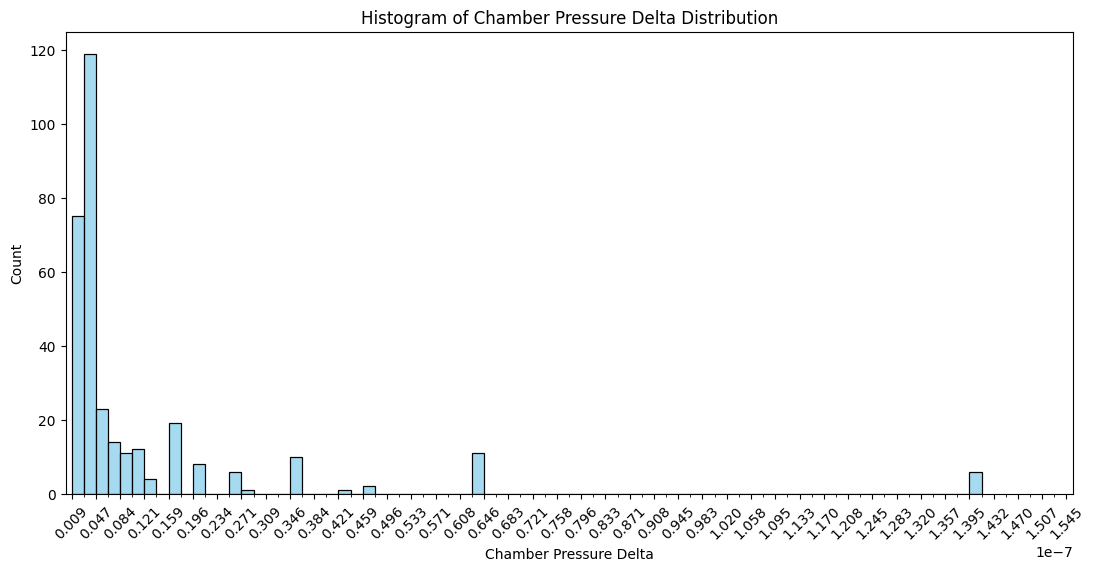

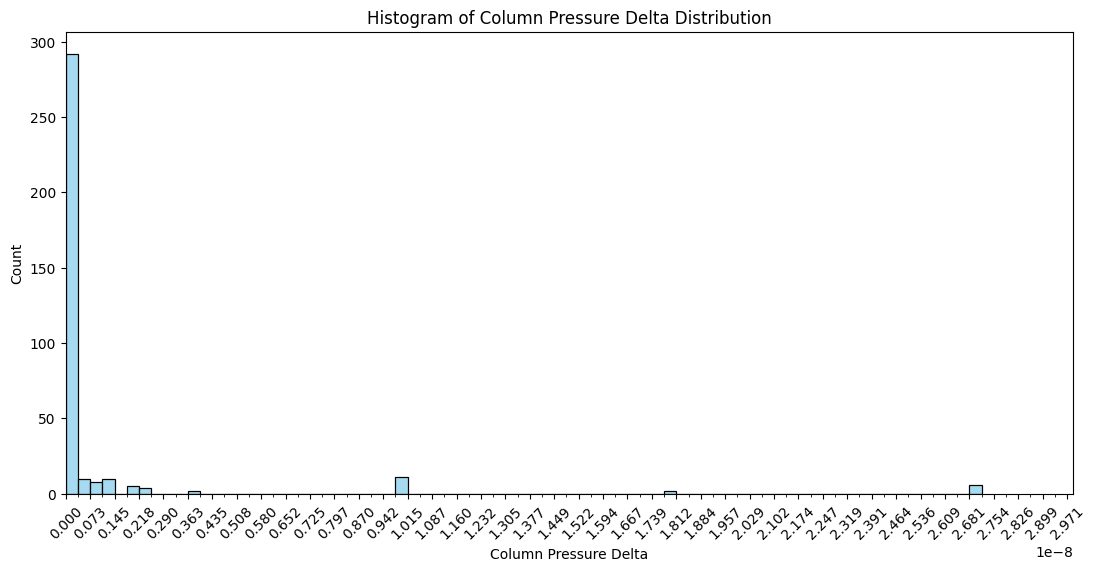

elapsed_time=0.5236070156097412


,Arc Time,Arc Component,Chamber Pressure Delta,Column Pressure Delta
0,2024-06-26 13:56:55,B2 Bias,8.00e-09,1.18e-11
1,2024-06-27 17:42:32,B2 Bias,1.69e-08,1.53e-11
2,2024-06-14 16:39:46,B2 Extractor,9.18e-09,3.70e-10
3,2024-06-14 22:51:35,B2 Extractor,1.73e-09,1.32e-11
4,2024-06-15 03:36:46,B2 Extractor,2.18e-09,1.65e-11
...,...,...,...,...
345,2024-06-16 00:55:15,D4 Gun Lens,4.09e-09,1.90e-11
346,2024-06-19 05:11:00,D4 Gun Lens,3.36e-09,1.29e-11
347,2024-06-22 03:36:43,D4 Gun Lens,2.45e-09,1.59e-11
348,2024-06-14 07:09:57,D4 Suppressor,NaN,6.64e-12


In [124]:
# MAIN LOOP
start_time = time.time()
pd.options.display.float_format = '{:.2e}'.format
col_hvps_list = list(arc_counts_df.columns[1:])                                      # list of all Column HVPS to be looped through
times = arc_counts_df["Time"]                                                            # get all Time values
pressure_delta_dict = {"Arc Time": [],
        "Arc Component": [],
        "Chamber Pressure Delta": [],
        "Column Pressure Delta": []
}
for col_idx, col_hvps in enumerate(col_hvps_list):
    # TERMINAL OUTPUT READABILITY
    lenght_symbol = (74-len(col_hvps))//2
    print(f"{'+'*lenght_symbol}{col_hvps}{'+'*lenght_symbol}")
    ########### HARDCODED - FIX ##########
    if col_hvps == 'C3 Suppressor':
        continue
    # GET ARC TIMES
    arc_times, arc_time_idx = get_arc_times(col_hvps)                                        # col_idx from enumerate will be offset by 1 from proper index in arc_counts
    # FILTER PRESSURE DATA BASED ON ARC TIMES
    pressure, arc_times_list, arc_component_list, chamber_delta_list, column_delta_list = pressure_window(col_hvps, arc_times, arc_time_idx)
    pressure_delta_dict["Arc Time"].extend(arc_times_list)
    pressure_delta_dict["Arc Component"].extend(arc_component_list)
    pressure_delta_dict["Chamber Pressure Delta"].extend(chamber_delta_list)
    pressure_delta_dict["Column Pressure Delta"].extend(column_delta_list)
pressure_delta_df = pd.DataFrame(pressure_delta_dict)
pressure_delta_df.to_csv('data/pressure_deltas_at_arcs.csv', index=False)
pressure_delta_dist_plot(pressure_delta_df, 75)
end_time = time.time()
elapsed_time = end_time-start_time
print(f"{elapsed_time=}")
pressure_delta_df
# Baseline: 55.4 seconds
# Current best: 50.4 seconds, 9.9% faster
# Now with updated delta methodology + plots: 1m18.5s

### Command to find files based on timestamp 
find pressure_at_arcs/* -name "2024_06_23__06_3*"